# What is the correlation between latitude and wealth?

In [3]:
import pandas

World city geo-locations

In [38]:
geoCityData = pandas.read_csv('http://simplemaps.com/static/demos/resources/world-cities/world_cities.csv')

In [39]:
geoCityData.columns

Index(['city', 'city_ascii', 'lat', 'lng', 'pop', 'country', 'iso2', 'iso3',
       'province'],
      dtype='object')

In [40]:
# population in million
geoCityData['pop'] /= 1000000
# rename the pop column
geoCityData.rename(columns={'pop': 'pop_in_million'}, inplace=True)
geoCityData.columns

Index(['city', 'city_ascii', 'lat', 'lng', 'pop_in_million', 'country', 'iso2',
       'iso3', 'province'],
      dtype='object')

In [41]:
geoCityData.sort_values('pop_in_million', ascending=False).head()

,city,city_ascii,lat,lng,pop_in_million,country,iso2,iso3,province
3492,Tokyo,Tokyo,35.685017,139.751407,22.006300,Japan,JP,JPN,Tokyo
3110,Mumbai,Mumbai,19.016990,72.856989,15.834918,India,IN,IND,Maharashtra
4074,Mexico City,Mexico City,19.442442,-99.130988,14.919501,Mexico,MX,MEX,Distrito Federal
2068,Shanghai,Shanghai,31.216452,121.436505,14.797756,China,CN,CHN,Shanghai
1171,Sao Paulo,Sao Paulo,-23.558680,-46.625020,14.433148,Brazil,BR,BRA,São Paulo


In [47]:
geoCityData[geoCityData['iso3'] == 'USA'].sort_values('pop_in_million', ascending=False).head()

,city,city_ascii,lat,lng,pop_in_million,country,iso2,iso3,province
7071,New York,New York,40.749979,-73.980017,13.524139,United States of America,US,USA,New York
7069,Los Angeles,Los Angeles,33.989978,-118.179980,8.097410,United States of America,US,USA,California
7068,Chicago,Chicago,41.829991,-87.750055,5.915976,United States of America,US,USA,Illinois
7065,Houston,Houston,29.819974,-95.339979,4.053287,United States of America,US,USA,Texas
7060,Philadelphia,Philadelphia,39.999973,-75.169996,3.504775,United States of America,US,USA,Pennsylvania


read local gross domestic product csv file

In [42]:
cityGDP = pandas.read_csv('https://raw.github.com/pletzer/jupyterMoons/master/citiesGDP.csv')

In [26]:
cityGDP.sort_values('GDP in US$bn 2005', ascending=False).head(10)

,Rank,City/Urban area,Country,GDP in US$bn 2005
0,1,Tokyo,Japan,1191
1,2,New York,USA,1133
2,3,Los Angeles,USA,639
3,4,Chicago,USA,460
4,5,Paris,France,460
5,6,London,UK,452
6,7,Osaka/Kobe,Japan,341
7,8,Mexico City,Mexico,315
8,9,Philadelphia,USA,312
9,10,Washington DC,USA,299


In [46]:
cityGDP[cityGDP['Country'] == 'USA'].head(10)

,Rank,City/Urban area,Country,GDP in US$bn 2005
1,2,New York,USA,1133
2,3,Los Angeles,USA,639
3,4,Chicago,USA,460
8,9,Philadelphia,USA,312
9,10,Washington DC,USA,299
10,11,Boston,USA,290
11,12,Dallas/Fort Worth,USA,268
14,15,San Francisco/Oakland,USA,242
15,16,Atlanta,USA,236
16,17,Houston,USA,235


Replace "USA" by "United States Of America"
Replace "UK" by "United Kingdom"

In [56]:
cityGDP.set_value(cityGDP['Country'] == 'USA', 'Country', 'United States Of America')
cityGDP.set_value(cityGDP['Country'] == 'UK', 'Country', 'United Kingdom')
cityGDP.head(20)

,Rank,City/Urban area,Country,GDP in US$bn 2005
0,1,Tokyo,Japan,1191
1,2,New York,United States Of America,1133
2,3,Los Angeles,United States Of America,639
3,4,Chicago,United States Of America,460
4,5,Paris,France,460
5,6,London,United Kingdom,452
6,7,Osaka/Kobe,Japan,341
7,8,Mexico City,Mexico,315
8,9,Philadelphia,United States Of America,312
9,10,Washington DC,United States Of America,299


In [62]:
import re
lats = []
gdp_per_capita = []
city_names = []
for index, row in cityGDP.iterrows():
    city, country, gdp = row[['City/Urban area', 'Country', 'GDP in US$bn 2005']]
    # cities like London exist in more than one country
    data = geoCityData[(geoCityData['city'] == city) & (geoCityData['country'] == country)]
    if len(data.values) > 0:
        lat = data['lat'].values[0]
        pop = data['pop_in_million'].values[0]
        # only keep cities with more than 1 million inhabitants
        if pop > 1:
            lats.append(lat)
            gdp_per_capita.append(1.e9 * gdp / (1.e6 *pop))
            city_names.append(city)


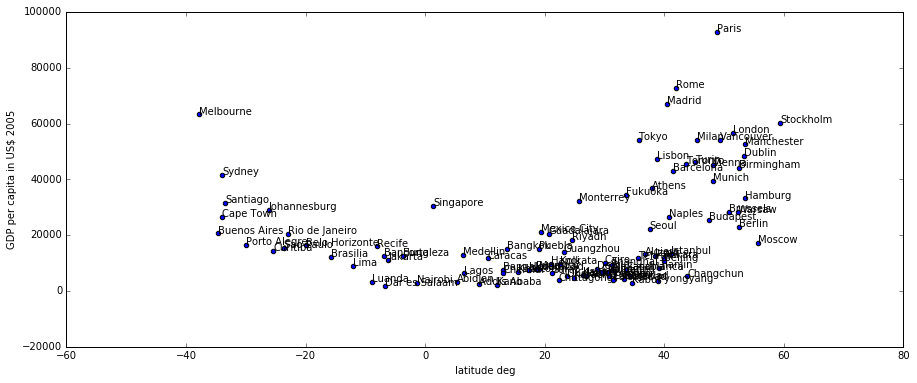

In [63]:
%matplotlib inline
from matplotlib import pyplot, pylab
pylab.rcParams['figure.figsize'] = (15, 6)
fig, ax = pyplot.subplots()
ax.scatter(lats, gdp_per_capita)
pyplot.xlabel('latitude deg')
pyplot.ylabel('GDP per capita in US$ 2005')
for i in range(len(lats)):
    ax.annotate(city_names[i], (lats[i], gdp_per_capita[i]))


In [ ]:
df = pandas.